In [38]:
import pandas as pd
import matplotlib as mpl
import ffn
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nhacheat/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [39]:
def get_stock(sticker,start='2016-01-01',end='2020-10-02'):
    #sticker = 'SSI'
    #start = '2017-01-01'
    file = "data/" + sticker + ".csv" 
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    df.index = df['date']
    del df['date']
    del df['name']
    # Create header 2 layer
    names = df.columns.tolist()
    sub = [sticker for _ in range(len(names))]
    header = [names,sub]
    df.columns = header
    # Filter dataframe with start and end date
   # df = df.loc[start:end]
    return df

In [40]:
def get_adj_portfolio(stickers,start_date='2016-01-01',end_date='2020-10-02'):
    df = pd.DataFrame()
    for i in range(len(stickers)):
        if(i==0): 
            sticker = stickers[i]
            df = get_stock(sticker,start_date,end_date)
        else:
            sticker = stickers[i]
            df1 = get_stock(sticker,start_date,end_date)
            df = df.join(df1,how='inner')
    return(df['adj_close'])


In [41]:
stickers = ['VN30INDEX','VPB', 'MBB','VCB','CTG']
end = '2020-10-07'
start = '2000-01-01'

In [42]:
prices = get_adj_portfolio(stickers,start,end)
prices.head()

,VN30INDEX,VPB,MBB,VCB,CTG
date,,,,,
2020-10-16,901.59,24.60,17.85,88.2,31.15
2020-10-15,899.20,24.05,17.60,88.6,30.05
2020-10-14,892.15,24.00,17.65,88.2,30.00
2020-10-13,878.35,23.40,17.50,86.5,30.55
2020-10-12,874.90,23.40,17.55,85.9,29.10


In [43]:
prices = prices.sort_index()
prices.head()

,VN30INDEX,VPB,MBB,VCB,CTG
date,,,,,
2017-08-17,743.20,24.10,14.63,35.73,17.88
2017-08-18,744.30,22.99,14.86,35.92,17.93
2017-08-21,743.66,22.16,14.72,35.82,17.88
2017-08-22,738.20,22.25,14.59,35.35,17.59
2017-08-23,743.10,22.37,14.59,35.44,17.59


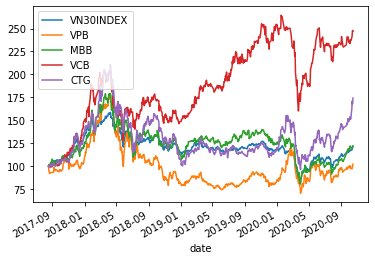

In [44]:
prices.rebase().plot()

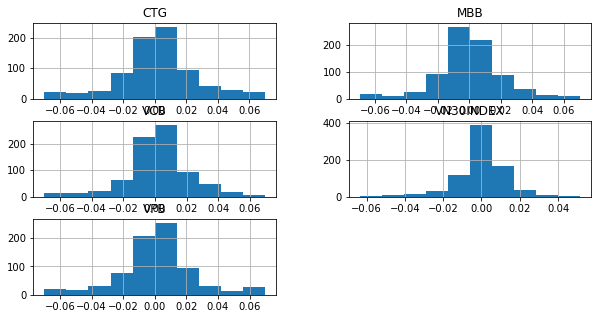

In [45]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(10, 5))

In [46]:
perf = prices.calc_stats()

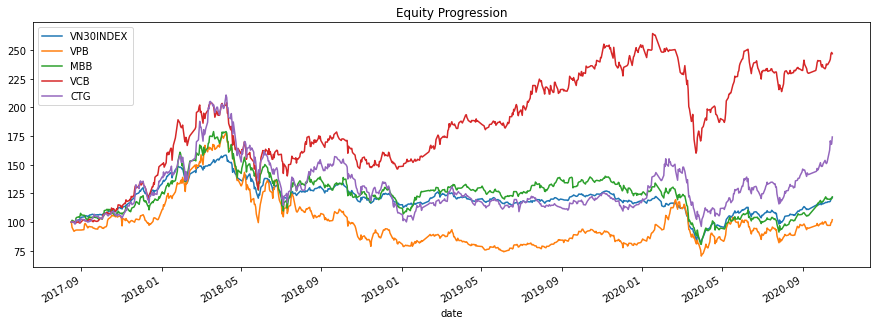

In [47]:
perf.plot()

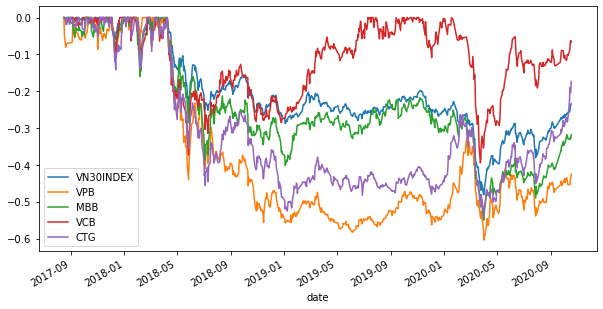

In [57]:
prices.to_drawdown_series().plot()

In [48]:
perf['VN30INDEX'].display_monthly_returns()

  Year    Jan    Feb     Mar     Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  ------  ------  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2017   0      0       0       0      0      0      0      3.62   2.94   4.91  13.4    3.44   31.26
  2018  12.34   1.13    4.05  -10.85  -7.85   0.03  -0.33   2.63   2.63  -9.37  -0.75  -4.45  -12.36
  2019   1.29   4.49   -0.54   -1.06  -1.6   -1.38   2.19   1.06   3.4   -0.02  -3.82  -0.95    2.82
  2020  -3.46  -1.96  -26.59   17.12  12.71  -4.43  -3.87  11.23   4.2    5.01   0      0       2.56


In [49]:
perf['DAG'].display_monthly_returns()

AttributeError: 'NoneType' object has no attribute 'display_monthly_returns'

In [ ]:
perf['NTP'].display_monthly_returns()

In [ ]:
perf['BMP'].display_monthly_returns()

In [ ]:
perf['HPG'].display_monthly_returns()

In [64]:
perf.set_riskfree_rate(0.05)

In [65]:
perf.stats

,VN30INDEX,VPB,MBB,VCB,CTG
start,2017-08-17 00:00:00,2017-08-17 00:00:00,2017-08-17 00:00:00,2017-08-17 00:00:00,2017-08-17 00:00:00
end,2020-10-16 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00
rf,0.05,0.05,0.05,0.05,0.05
total_return,0.213119,0.0207469,0.220096,1.46851,0.74217
cagr,0.0629434,0.00650921,0.0648711,0.330436,0.191722
max_drawdown,-0.481387,-0.604249,-0.550038,-0.394709,-0.543767
calmar,0.130754,0.0107724,0.117939,0.837164,0.352582
mtd,0.0501433,0.0357895,0.039604,0.0487515,0.173258
three_month,0.099728,0.0884956,0.172799,0.0562874,0.292531
six_month,0.240885,0.131034,0.243902,0.238764,0.573232


In [66]:
returns.calc_mean_var_weights().as_format('.2%')

VN30INDEX      0.00%
VPB            0.00%
MBB            0.00%
VCB          100.00%
CTG            0.00%
dtype: object

In [70]:
returns.calc_risk_return_ratio()

VN30INDEX    0.026013
VPB          0.013103
MBB          0.022788
VCB          0.068523
CTG          0.041478
dtype: float64

Text(0.5, 0.98, 'Return Scatter Matrix')

<Figure size 720x360 with 0 Axes>

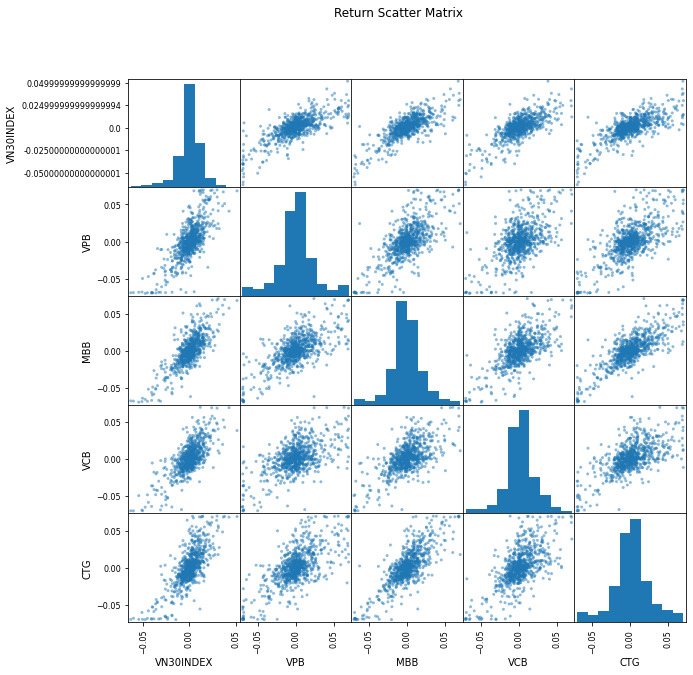

In [58]:
perf.plot_scatter_matrix()